# short notebook to show how to get the mc info or recalculate the energy distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ctapipe.utils import get_dataset_path
from eventio import SimTelFile
from lstchain import mc

In [2]:
simtel_file = get_dataset_path('gamma_test_large.simtel.gz')

In [3]:
source = SimTelFile(simtel_file)

In [4]:
source.mc_run_headers[0]

{'shower_prog_id': 1,
 'shower_prog_vers': 6990,
 'shower_prog_start': 1467892800,
 'detector_prog_id': 1,
 'detector_prog_vers': 1462392225,
 'detector_prog_start': 1467924457,
 'obsheight': 2150.0,
 'n_showers': 20000,
 'n_use': 20,
 'core_pos_mode': 1,
 'core_range': array([   0., 3000.], dtype=float32),
 'alt_range': array([1.2217305, 1.2217305], dtype=float32),
 'az_range': array([0., 0.], dtype=float32),
 'diffuse': 1,
 'viewcone': array([ 0., 10.], dtype=float32),
 'E_range': array([3.0e-03, 3.3e+02], dtype=float32),
 'spectral_index': -2.0,
 'B_total': 23.11772346496582,
 'B_inclination': -0.39641156792640686,
 'B_declination': 0.0,
 'injection_height': -1.0,
 'atmosphere': 26,
 'corsika_iact_options': 187,
 'corsika_low_E_model': 2,
 'corsika_high_E_model': 3,
 'corsika_bunchsize': 5.0,
 'corsika_wlen_min': 240.0,
 'corsika_wlen_max': 700.0,
 'corsika_low_E_detail': 0,
 'corsika_high_E_detail': 303}

In [6]:
emin, emax = source.mc_run_headers[0]['E_range']
spectral_index = source.mc_run_headers[0]['spectral_index']
num_showers = source.mc_run_headers[0]['n_showers']
num_use = source.mc_run_headers[0]['n_use']
num_events = num_showers * num_use

---
## Compute the energy distribution

\begin{align}
N_{tot} = \int_{E_{min}}^{E_{max}} \frac{dN}{dE} dE = \int_{E_{min}}^{E_{max}} E^{\gamma} dE
\end{align}

If $\gamma = 1$:
$$
N_{tot} = \ln(E_{max}/E_{min})
$$

Else:
$$
N_{tot} = \frac{E_{max}^{\gamma+1} - E_{min}^{\gamma+1}}{\gamma + 1}
$$

In [7]:
bins, y = mc.power_law_integrated_distribution(emin, emax, num_events, spectral_index)

---

## Getting the true simulated energies

In [8]:
energies = []
with SimTelFile(simtel_file) as f:
    for i, event in enumerate(f.iter_mc_events()):
        energies.append(event['mc_shower']['energy'])

## Comparing both

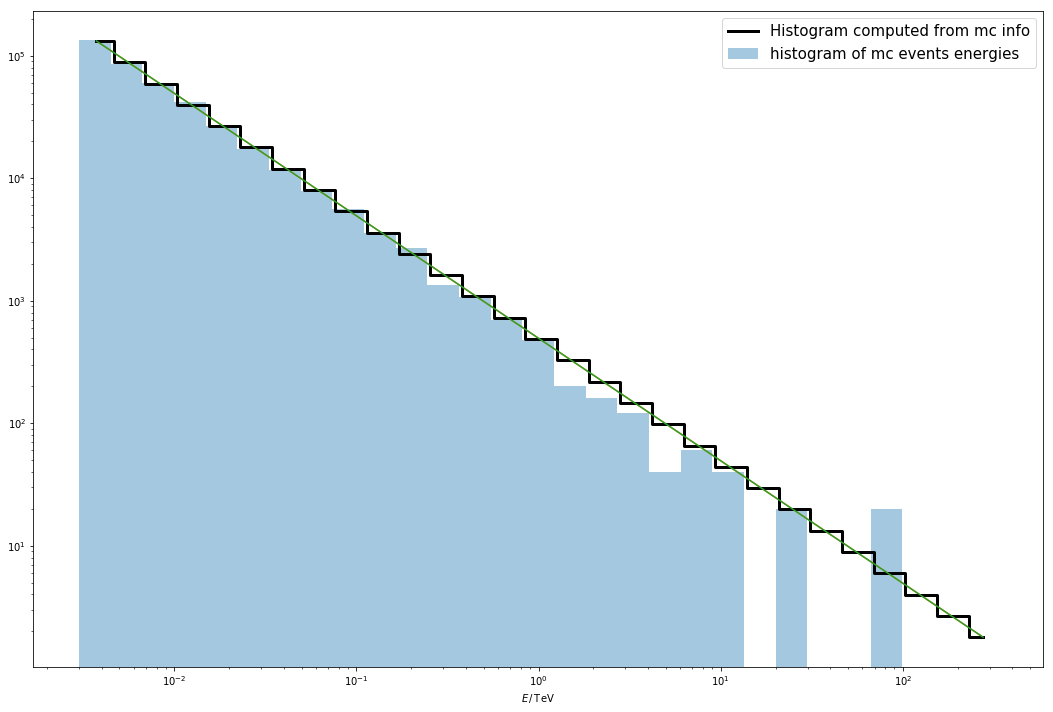

In [9]:
e_mean = (bins[:-1] + bins[1:])/2.


plt.figure(figsize=(15,10))
plt.hist(energies,
         bins=bins, 
#          histtype='step',
         alpha=0.4,
         label='histogram of mc events energies',
        )
plt.xscale('log')
plt.xlabel(r'$E \,/\, \mathrm{TeV}$')
plt.tight_layout()
plt.yscale('log')

plt.plot(e_mean, y)

# plt.bar(e_mean, y, width=bins[:-1]-bins[1:], log=True, 
#         color='red', alpha=0.5,
#         label='Histogram computed from mc info')

plt.step(e_mean, y, where='mid', 
         linewidth=3,
         color='black',
         label='Histogram computed from mc info'
        )

plt.plot(e_mean, y)

plt.legend(fontsize=15);
